# ランダム化比較試験 (Randomized Controlled Trial; RCT)

概要と基本用語

ランダム化比較試験 (RCT) は、介入の有無による因果効果を明確にする実験デザインのゴールドスタンダード。

- 治療群 (Treatment Group)：介入（治療）を受けるグループ
- 対照群 (Control Group)：介入を受けないグループ
- ランダム割り当て (Random Assignment)：被験者を無作為に治療群と対照群に分けることで、交絡因子 (confounders) の影響を均等化し、因果関係の推定バイアスを減少させる。

t検定の詳細な解説

RCT の解析では、治療群と対照群のアウトカムの平均値の差が偶然の変動によるものか、統計的に有意なものかを確認するために t検定 を使用。

t検定の基本式

2群の平均値の差の検定では、t 値は以下の式で計算される。


$t = \frac{\bar{X}_1 - \bar{X}_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_0^2}{n_0}}}$

- $\bar{X}_1, \bar{X}_0$: 治療群と対照群の平均値  
- $s_1^2, s_0^2$: 各群の分散  
- $n_1, n_0$: 各群のサンプルサイズ  

**仮説**  
- 帰無仮説 (H₀): $\bar{X}_1 = \bar{X}_0$ （治療効果はゼロ）  
- 対立仮説 (H₁): $\bar{X}_1 \neq \bar{X}_0$

t 値を基に、対応する自由度の t 分布から p 値を算出し、通常  p < 0.05  なら帰無仮説を棄却して、治療効果が統計的に有意であると判断する。

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)
n = 10000

# 被験者をランダムに治療群（1）と対照群（0）に割り当てる（50%ずつ）
treatment = np.random.binomial(1, 0.5, n)

# 各被験者のベースとなるアウトカム（例: 基本スコア50にノイズを加える）
base_outcome = 50 + np.random.normal(0, 5, n)

# 治療効果（治療群は平均で +10 ポイントの効果）
treatment_effect = treatment * 10

# 最終アウトカム
outcome = base_outcome + treatment_effect

df_rct = pd.DataFrame({
    'subject_id': np.arange(n),
    'treatment': treatment,
    'outcome': outcome
})

# 各群の基本統計量を確認
print(df_rct.groupby('treatment')['outcome'].describe())

            count       mean       std        min        25%        50%  \
treatment                                                                 
0          5076.0  50.113070  5.020006  30.816722  46.774133  50.110159   
1          4924.0  60.008901  4.976949  40.387999  56.623682  60.044412   

                 75%        max  
treatment                        
0          53.441847  72.395421  
1          63.367569  77.144552  


In [3]:
# t検定: 治療群と対照群の平均差が有意か検定
group0 = df_rct[df_rct['treatment'] == 0]['outcome']
group1 = df_rct[df_rct['treatment'] == 1]['outcome']
t_stat, p_value = stats.ttest_ind(group1, group0)
print(f"t検定: t = {t_stat:.2f}, p = {p_value:.3e}")

t検定: t = 98.97, p = 0.000e+00


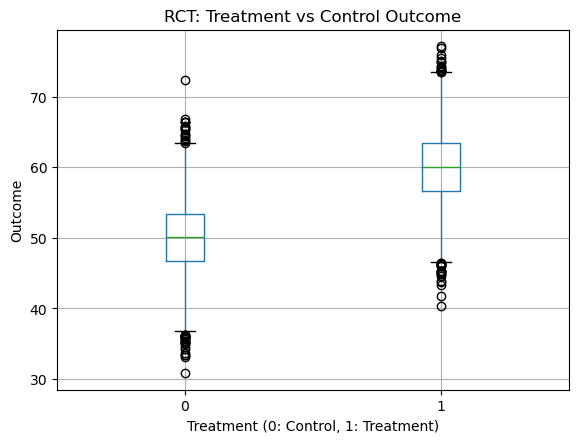

In [4]:
# 箱ひげ図で分布を可視化
df_rct.boxplot(column='outcome', by='treatment')
plt.title("RCT: Treatment vs Control Outcome")
plt.suptitle("")
plt.xlabel("Treatment (0: Control, 1: Treatment)")
plt.ylabel("Outcome")
plt.show()